# Homework 2
###### by Mher Movsisyan
---

### Problem 1 (30 points)  
New Zealand Grazing Company producing premium nutritional milk products aims to increase its market share in the local market. There are two types of dairy cow breeds that the company is interested in to invest. Ayrshire can be bought for $200 each and Holstein cost $500 each. The Ayrshire cows produce 40 gallons of milk per week and the Holstein ones produce 55 gallons of milk per week. A gallon of milk can be sold for $3.5. The cost to feed one cow per week is $100. The financial limitation is to spend $9500 for purchasing cows and the total number of cows to be bought cannot exceed 20 cows.  
  
Use python to:  
1. Formulate a linear programming model for this problem, and find the optimal combination of Ayrshire and Holstein cows. (15 points)  
2. Provide an interpretation of your findings. (15 points)

In [24]:
import pulp as pl
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

# Cow cost
ayrshire = 200
holstein = 500

# Gallons of milk per week per cow
ayrshire_out = 40
holstein_out = 55

# Gallon sold at
milk_price = 3.5

# Cost of feeding
cow_maintanance = 100

max_cows = 20
budget = 9500

We will try to maximize our weekly profit using this objective:  
$$ objective = milk\_price * ((ayrshire\_out * n\_ayrshire) + $$
$$ (holstein\_out * n\_holstein)) - (n\_ayrshire + n\_holstein) * cow\_maintanance $$

In [25]:
model = LpProblem(name="profit", sense=LpMaximize)
n_ayrshire = LpVariable(name="n_ayrshire", lowBound=0, upBound=20, cat="Integer")
n_holstein = LpVariable(name="n_holstein", lowBound=0, upBound=20, cat="Integer")

max_cows_constraint = n_ayrshire + n_holstein <= 20
budget_constraint = n_ayrshire * ayrshire + n_holstein * holstein <= 9500

objective = lpSum([
    n_ayrshire * ((milk_price * ayrshire_out) - cow_maintanance),
    n_holstein * ((milk_price * holstein_out) - cow_maintanance)
])
    
model += (max_cows_constraint, "max_cows_constraint")
model += (budget_constraint, "budget_constraint")
model += objective

model

profit:
MAXIMIZE
40.0*n_ayrshire + 92.5*n_holstein + 0.0
SUBJECT TO
max_cows_constraint: n_ayrshire + n_holstein <= 20

budget_constraint: 200 n_ayrshire + 500 n_holstein <= 9500

VARIABLES
0 <= n_ayrshire <= 20 Integer
0 <= n_holstein <= 20 Integer

In [26]:
status = model.solve()
print("Cow config for profit: ", pl.value(n_ayrshire), pl.value(n_holstein))

Cow config for profit:  0.0 19.0


In [27]:
model = LpProblem(name="income", sense=LpMaximize)
n_ayrshire = LpVariable(name="n_ayrshire", lowBound=0, upBound=20, cat="Integer")
n_holstein = LpVariable(name="n_holstein", lowBound=0, upBound=20, cat="Integer")

max_cows_constraint = n_ayrshire + n_holstein <= 20
budget_constraint = n_ayrshire * ayrshire + n_holstein * holstein <= 9500

objective = lpSum([
    n_ayrshire * ((milk_price * ayrshire_out)),
    n_holstein * ((milk_price * holstein_out))
])
    
model += (max_cows_constraint, "max_cows_constraint")
model += (budget_constraint, "budget_constraint")
model += objective

model

income:
MAXIMIZE
140.0*n_ayrshire + 192.5*n_holstein + 0.0
SUBJECT TO
max_cows_constraint: n_ayrshire + n_holstein <= 20

budget_constraint: 200 n_ayrshire + 500 n_holstein <= 9500

VARIABLES
0 <= n_ayrshire <= 20 Integer
0 <= n_holstein <= 20 Integer

In [28]:
status = model.solve()
print("Cow config for income: ", pl.value(n_ayrshire), pl.value(n_holstein))
print(pl.value(model.objective))

Cow config for income:  2.0 18.0
3745.0


To maximize our profit we should buy 19 Holstein cows since they give more milk while having the same maintenance cost, but to get the most money in we need to buy 18 Holsteins and 2 Ayrshires. Both of these models have a flaw, they fail to account for risks and if for example a disease infects all Holsteins, we will be left alone to cry in the corner with our possibly two Ayrshires :(

### Problem 2 (40 points)  
2.1 Read data from the "Yahoo" finance for the following companies starting from January 1, 2019 to December 31, 2021:  
Ethereum USD : `ETH-USD`  
Tesla : `TSLA`  
Volkswagen : `VWAGY`  
Store them in the corresponding trading category. (5 points)  

In [29]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

eth = "ETH-USD"
tsla = "TSLA"
vw = "VWAGY"

start = datetime(2019, 1, 1)
end = datetime(2021, 12, 31)

eth_df = yf.Ticker(eth).history(start=start, end=end)
tsla_df = yf.Ticker(tsla).history(start=start, end=end)
vw_df = yf.Ticker(vw).history(start=start, end=end)

vw_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,13.978416,14.156398,13.960162,14.127191,94200,0.0,0
2019-01-03 00:00:00-05:00,14.065124,14.147270,14.028615,14.101633,90100,0.0,0
2019-01-04 00:00:00-05:00,14.384579,14.681214,14.357196,14.621888,106500,0.0,0
2019-01-07 00:00:00-05:00,14.845505,14.923088,14.758797,14.824513,158100,0.0,0
2019-01-08 00:00:00-05:00,15.160398,15.185955,14.950470,15.008885,106900,0.0,0
...,...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,28.408212,29.088642,28.407252,28.791134,382800,0.0,0
2021-12-27 00:00:00-05:00,28.550248,28.764262,28.484029,28.714357,337100,0.0,0
2021-12-28 00:00:00-05:00,28.878466,28.954283,28.656775,28.674049,333600,0.0,0


2.2 Clean/manipulate your data in a way so that all instruments have equal trading dates and keep the
'Adjusted Close' column for further analysis (5 points)

In [30]:
# if you encounter an error just rerun the previous cell

assert not (
        vw_df.isna().sum() + \
        tsla_df.isna().sum() + \
        eth_df.isna().sum()
    ).sum(), "Your data has nans mate"

weekday = eth_df.index.to_series().dt.date.isin(tsla_df.index.to_series().dt.date)

eth_df = eth_df.loc[weekday].reset_index()
tsla_df = tsla_df.reset_index()
vw_df = vw_df.reset_index()

eth_df.Date = eth_df.Date.dt.date
tsla_df.Date = tsla_df.Date.dt.date
vw_df.Date = vw_df.Date.dt.date

eth_df = eth_df[["Date", "Close"]]
tsla_df = tsla_df[["Date", "Close"]]
vw_df = vw_df[["Date", "Close"]]

eth_df

,Date,Close
0,2019-01-02,155.047684
1,2019-01-03,149.135010
2,2019-01-04,154.581940
3,2019-01-07,151.699219
4,2019-01-08,150.359634
...,...,...
751,2021-12-23,4108.015625
752,2021-12-27,4037.547607
753,2021-12-28,3800.893066
754,2021-12-29,3628.531738


2.3 Plot line charts for the financial analysis and provide findings from your graph for each instrument.
(10 points)

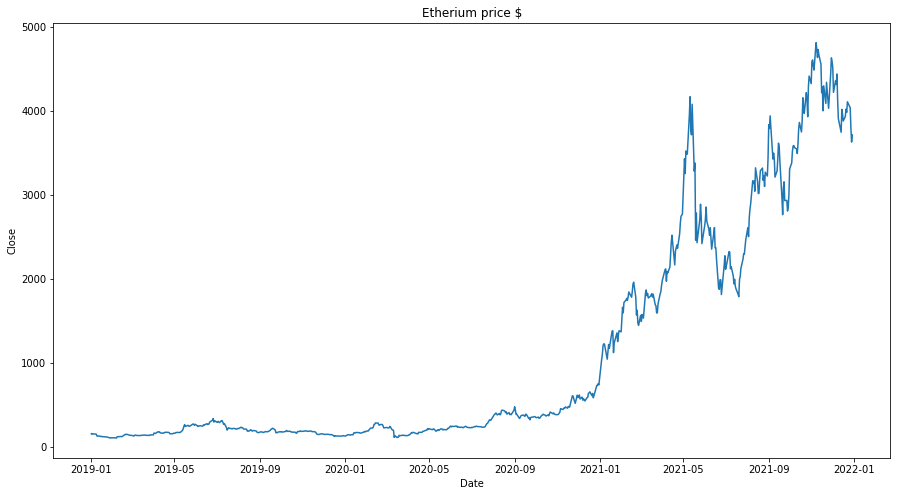

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize = (15,8))
sns.lineplot(x="Date", y="Close", data=eth_df).set(title="Etherium price $");

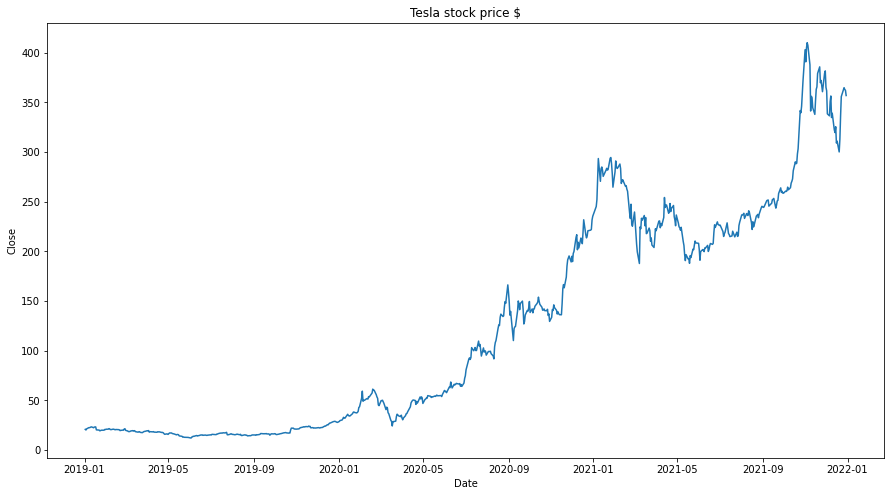

In [32]:
plt.figure(figsize = (15,8))
sns.lineplot(x="Date", y="Close", data=tsla_df).set(title="Tesla stock price $");

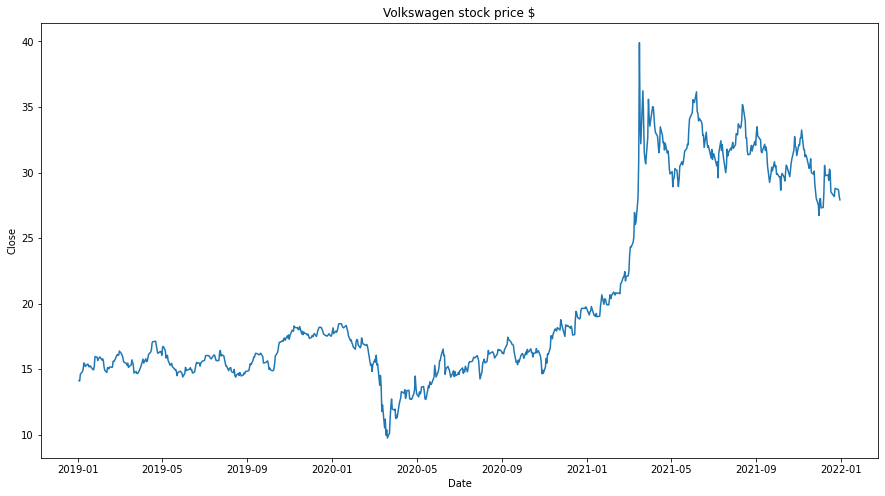

In [33]:
plt.figure(figsize = (15,8))
sns.lineplot(x="Date", y="Close", data=vw_df).set(title="Volkswagen stock price $");

We can see that Tesla and Eth are similar in terms of growth